**Perception in Robotics**

**PS2: Localization**

**Aikun Bexultanova**

**Landmark localization**


# Task A:

**1. Write the value for the covariance $Q$ of the noise added to the observation function, knowing that the parameter *bearing_std*  is its standard deviation.**

`run.py`:

    
        parser.add_argument('-b',
                        '--bearing_std',
                        type=float,
                        action='store',
                        help='Diagonal of Standard deviations of the Observation noise Q. (format: rad).',
                        default=0.35)
    
$Q = \begin{bmatrix} \sigma_{\phi}^2 \end{bmatrix} $, $\sigma_{\phi}^2$ = `bearing_std` = 0.35.

**2. Write the equation for the covariance $R_t$ of the noise added to the transition function, as explained in class and their corresponding numeric values for the
initial robot command $u = [δ_{rot1} , δ_{trans} , δ_{rot2} ]^⊤ = [0, 10, 0]^⊤$. Find out the default values of $α$ in *run.py* line 152.**

For odometry motion model we have $\epsilon_t = \begin{bmatrix} \epsilon_{\delta_{rot1}} \\ \epsilon_{\delta_{trans}} \\ \epsilon_{\delta_{rot2}} \end{bmatrix} \sim \mathcal{N}\left(0, \begin{bmatrix}\alpha_1\delta_{rot1}^2 + \alpha_2\delta_{trans}^2 && 0 && 0 \\ 0 && \alpha_3\delta_{trans}^2 + \alpha_4(\delta_{rot1}^2 + \delta_{rot2}^2) && 0 \\ 0 && 0 && \alpha_1\delta_{rot2}^2 + \alpha_2\delta_{trans}^2 \end{bmatrix}\right)$

As initial command $u = \left[\delta_{rot1}, \delta_{trans}, \delta_{rot2}\right]^{\top} = [0, 10, 0]^{\top}$ and default values of alphas $\alpha_{1 \dots 4} = (0.05^2, 0.001^2, 0.05^2, 0.01^2)$, then $R = \begin{bmatrix}100\alpha_2 && 0 && 0 \\ 0 && 100\alpha_3 && 0 \\ 0 && 0 && 100\alpha_2 \end{bmatrix} = \begin{pmatrix} 0.001^2 * 100 & 0 & 0\\ 0 & 0.05^2 * 100 & 0 \\ 0 & 0 & 0.001^2 * 100\end{pmatrix} = \begin{pmatrix} 0.0001 & 0 & 0\\ 0 & 0.25 & 0 \\ 0 & 0 & 0.0001 \end{pmatrix}$

**3. Derive the equations for the Jacobians $G_t$ , $V_t$ and $H_t$ , and evaluate them at the initial mean state
$µ_1 = [x, y, θ]^⊤ = [180, 50, 0]^⊤$ as it is considered in *run.py*.**

$$  G_t = \frac{\partial g(x_{t-1}, u_t, \varepsilon_t)}{\partial x_{t-1}} |_{\mu_{t-1}, \varepsilon_t =0} = \begin{bmatrix} 1 & 0 & - \delta_{trans} \sin (\theta + δ_{rot1}) \\ 0 & 1 & \delta_{trans} \cos (\theta + δ_{rot1}) \\ 0 & 0 & 1 \\ \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 10 \\ 0 & 0 & 1 \\ \end{bmatrix}$$ 

$$ V_t = \frac{\partial g(x_{t-1}, u_t, \varepsilon_t)}{\partial u_{t}} |_{\mu_{t-1}, \varepsilon_t =0} = \begin{bmatrix}
    - \delta_{trans} \sin (\theta + δ_{rot1}) & \cos (\theta + δ_{rot1}) & 0 \\
    \delta_{trans} \cos (\theta + δ_{rot1}) & \sin (\theta + δ_{rot1}) & 0 \\
    1 & 0 & 1 \\
\end{bmatrix} = \begin{bmatrix}
    0 & 1 & 0 \\
    10 & 0 & 0 \\
    1 & 0 & 1 \\
\end{bmatrix}$$

$$
H_t = \frac{\partial h(x_t)}{\partial \mu_t} = 
\begin{bmatrix}
-\frac{(m_{j,x} - \mu_{t,x})}{\sqrt{(m_{j,x} - \mu_{t,x})^2 + (m_{j,y} - \mu_{t,y})^2}} & -\frac{(m_{j,y} - \mu_{t,y})}{\sqrt{(m_{j,x} - \mu_{t,x})^2 + (m_{j,y} - \mu_{t,y})^2}} & 0 \\
\frac{(m_{j,y} - \mu_{t,y})}{(m_{j,x} - \mu_{t,x})^2 + (m_{j,y} - \mu_{t,y})^2} & -\frac{(m_{j,x} - \mu_{t,x})}{(m_{j,x} - \mu_{t,x})^2 + (m_{j,y} - \mu_{t,y})^2} & -1
\end{bmatrix}
$$

In our case Output measurement (observation) vector is $y_t = [bearing, ID]^T$ but $\sigma_{ID} = 0$ and then state vector is $x_t = [x, y, θ]^⊤$

$$H_t = \frac{\partial h(x_{t})}{\partial x_{t}} |_{\bar{\mu}_{t}} = \begin{bmatrix}
\frac{m_{i,y} - \bar{\mu}_{t,y}}{(m_{i,x} - \bar{\mu}_{t,x})^2 + (m_{i,y} - \bar{\mu_{t,y}})^2} & \frac{- (m_{i,x} - \bar{\mu}_{t,x})}{(m_{i,x} - \bar{\mu}_{t,x})^2 + (m_{i,y} - \bar{\mu_{t,y}})^2} & -1\\
\end{bmatrix}$$


In [1]:
import numpy as np

In [2]:
mean_prior = np.array([180., 50., 0.])
_landmark_poses_x = np.array([21, 242, 463, 463, 242, 21])
_landmark_offset_y = np.array([0, 0, 0, 292, 292, 292])

b = (242 - 180)**2 + (50)**2

H = np.array([50/b, -(242 - 180)/b, -1])

print("H = ", H)

H =  [ 0.00788146 -0.00977301 -1.        ]


# Task B
**Implement EKF and PF-based robot localization using odometry and bearing-only observations to features in a landmark map. Remember to run the evaluation command to properly use the common created data file *evaluation-input.npy*.**

Implemented in ekf.py and pf.py

# Task C: 
**Create plots of pose error versus time i.e., a plot of $x̂ − x$ vs. $t$, $ŷ − y$ vs $t$, and $θ̂ − θ$ vs. $t$ where
$(x̂, ŷ, θ̂)$ is the ﬁlter estimated pose and $(x, y, θ)$ is the ground-truth actual pose known only to the simulator.
Plot the error in blue and in red plot the $±3σ$ uncertainty bounds. Your state error should lie within these
bounds approximately 99.73% of the time (assuming Gaussian statistics). For the PF, use the sample mean
and variance.**

In [56]:
import matplotlib.pyplot as plt
from tools.task import wrap_angle
from IPython.display import Video
#from tools.data import load_data

In [57]:
def plot_results(real_traj, pred_traj, cov, num_steps, plt_title=None):
    error = real_traj - pred_traj
    
    for i, er in enumerate(error[:, -1]):
        if er < -np.pi or er > np.pi:
            error[i, -1] = wrap_angle(er)

    fig, axs = plt.subplots(1, 3, figsize=(25, 7))
    labels = [r'$\hat{x} - x$', r'$\hat{y} - y$', r'$\hat{z} - z$']
    titles = ['pose error x', 'pose error y', 'pose error theta']
    
    if plt_title:
        fig.suptitle(plt_title, fontsize=16)

    for i in range(error.shape[-1]):
        axs[i].plot(np.arange(num_steps), error[:, i], label=labels[i])
        sigma = np.sqrt(cov[i])
        axs[i].fill_between(np.arange(num_steps), -3*sigma, 3*sigma, color='red', alpha=0.5, label='$\pm$3sigma')
        axs[i].grid('on')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('time')
        axs[i].set_ylabel('error')
        axs[i].legend()

In [58]:
def load_data(filename_gt, filename_predict):
    input_data = np.load(filename_gt)
    output = np.load(filename_predict)

    covariance_matrices = output['covariance_trajectory']
    covs = np.array([np.diag(covariance_matrices[:, :, i]) for i in range(covariance_matrices.shape[-1])]).T
    return input_data, output, covs

In [59]:
filename_gt = './ekf_out/input_data.npy'
filename_pf = './pf_out/output_data.npy'
filename_ekf = './ekf_out/output_data.npy'

## EKF

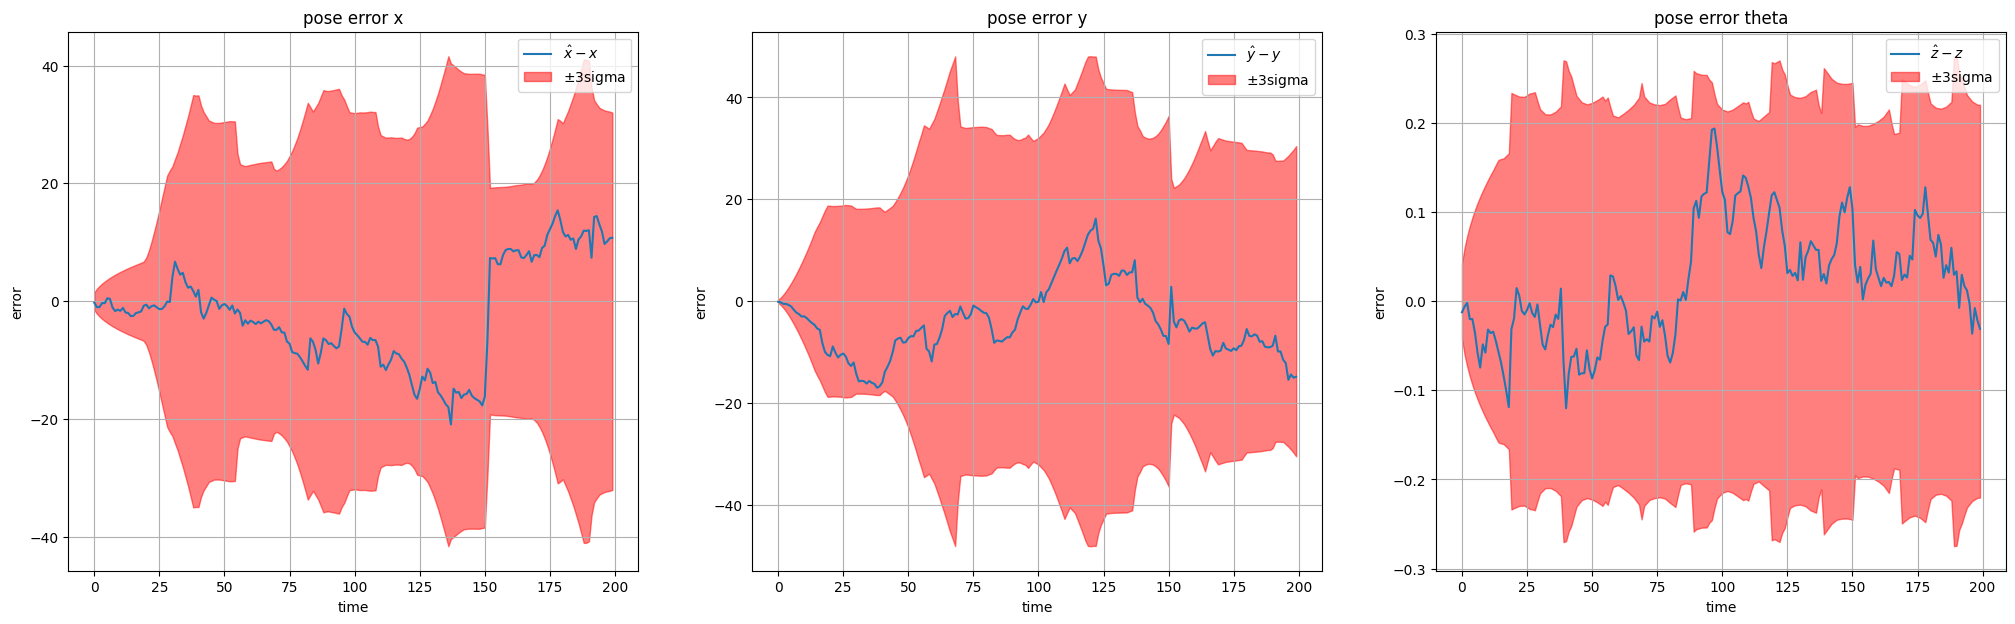

In [60]:
input_data, output_ekf, covs_ekf = load_data(filename_gt, filename_ekf)
plot_results(input_data['real_robot_path'], output_ekf['mean_trajectory'], covs_ekf, input_data['num_steps'])

## PF

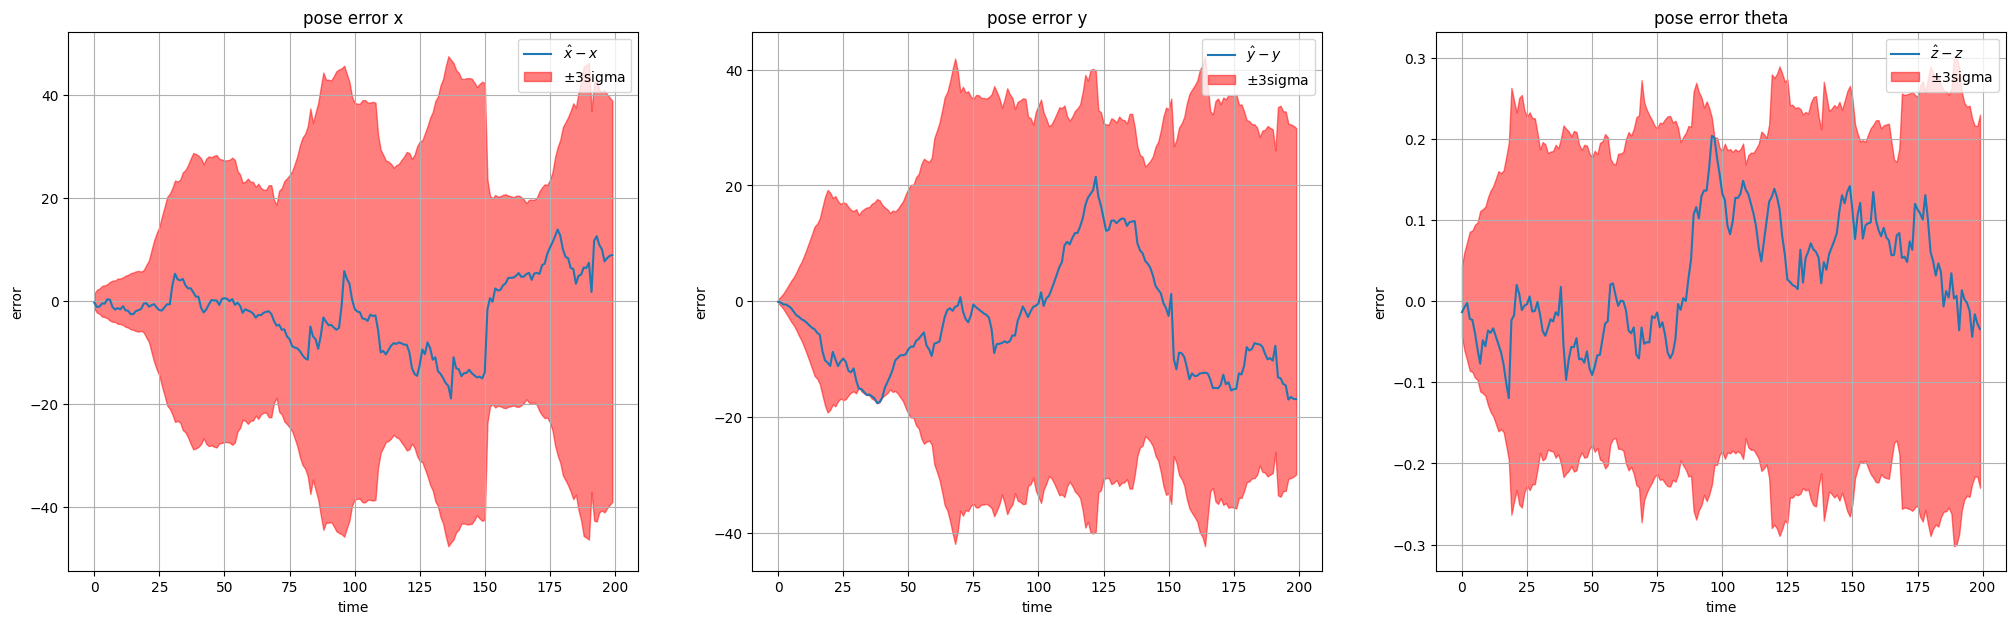

In [61]:
input_data, output_ekf, covs_ekf = load_data(filename_gt, filename_pf)
plot_results(input_data['real_robot_path'], output_ekf['mean_trajectory'], covs_ekf, input_data['num_steps'])

Comment: an estimation error lays within $\pm 3\sigma$ interval.

**D. Once your filters are implemented, please investigate some properties of them.**

**1. How does EKF behaves when motion noise goes towards zero?**

Let us assume following sets of motion noise constants in EKF

1: $ \alpha = 0.85 \cdot [0.05, 0.001, 0.05, 0.01] $

2: $ \alpha = 0.3 \cdot [0.05, 0.001, 0.05, 0.01] $

3: $ \alpha = 0 \cdot [0.05, 0.001, 0.05, 0.01] $

In [62]:
alpha0 = np.array([0.05, 0.001, 0.05, 0.01])
alpha1 = 0.9 * alpha0
alpha1

array([0.045 , 0.0009, 0.045 , 0.009 ])

In [63]:
alpha2 = 0.3 * alpha0
alpha2

array([0.015 , 0.0003, 0.015 , 0.003 ])

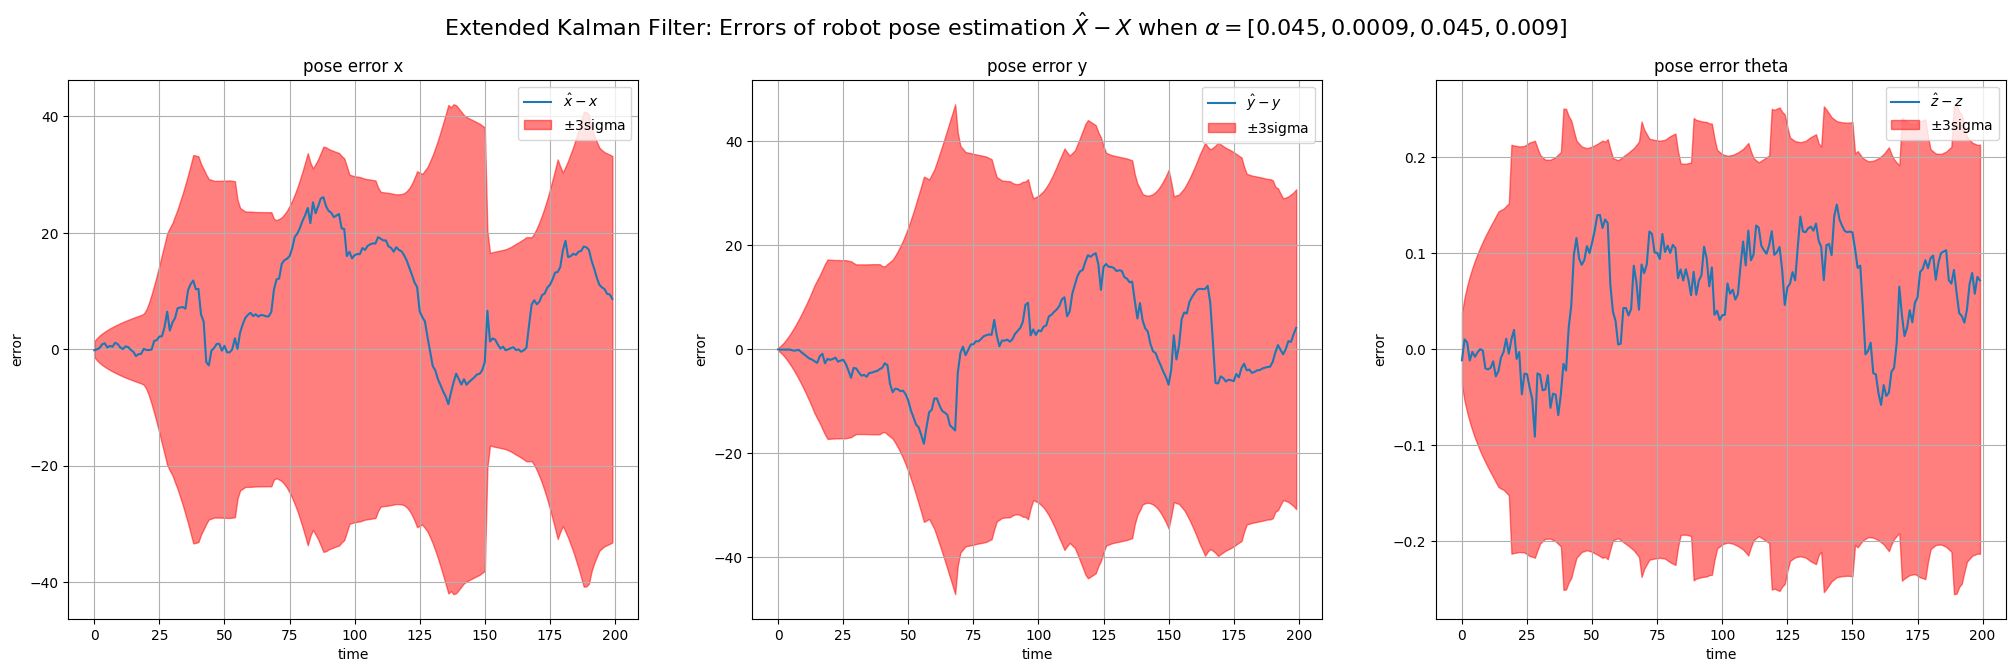

In [64]:
# load the data with alpha = alpha1
alpha1_input, alpha1_output, covs1 = load_data('Task_D/alpha1/input_data.npy', 'Task_D/alpha1/output_data.npy')

alpha1_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $\alpha=[0.045 , 0.0009, 0.045 , 0.009 ]$'

plot_results(alpha1_input['real_robot_path'], alpha1_output['mean_trajectory'], covs1, alpha1_input['num_steps'], plt_title = alpha1_title)

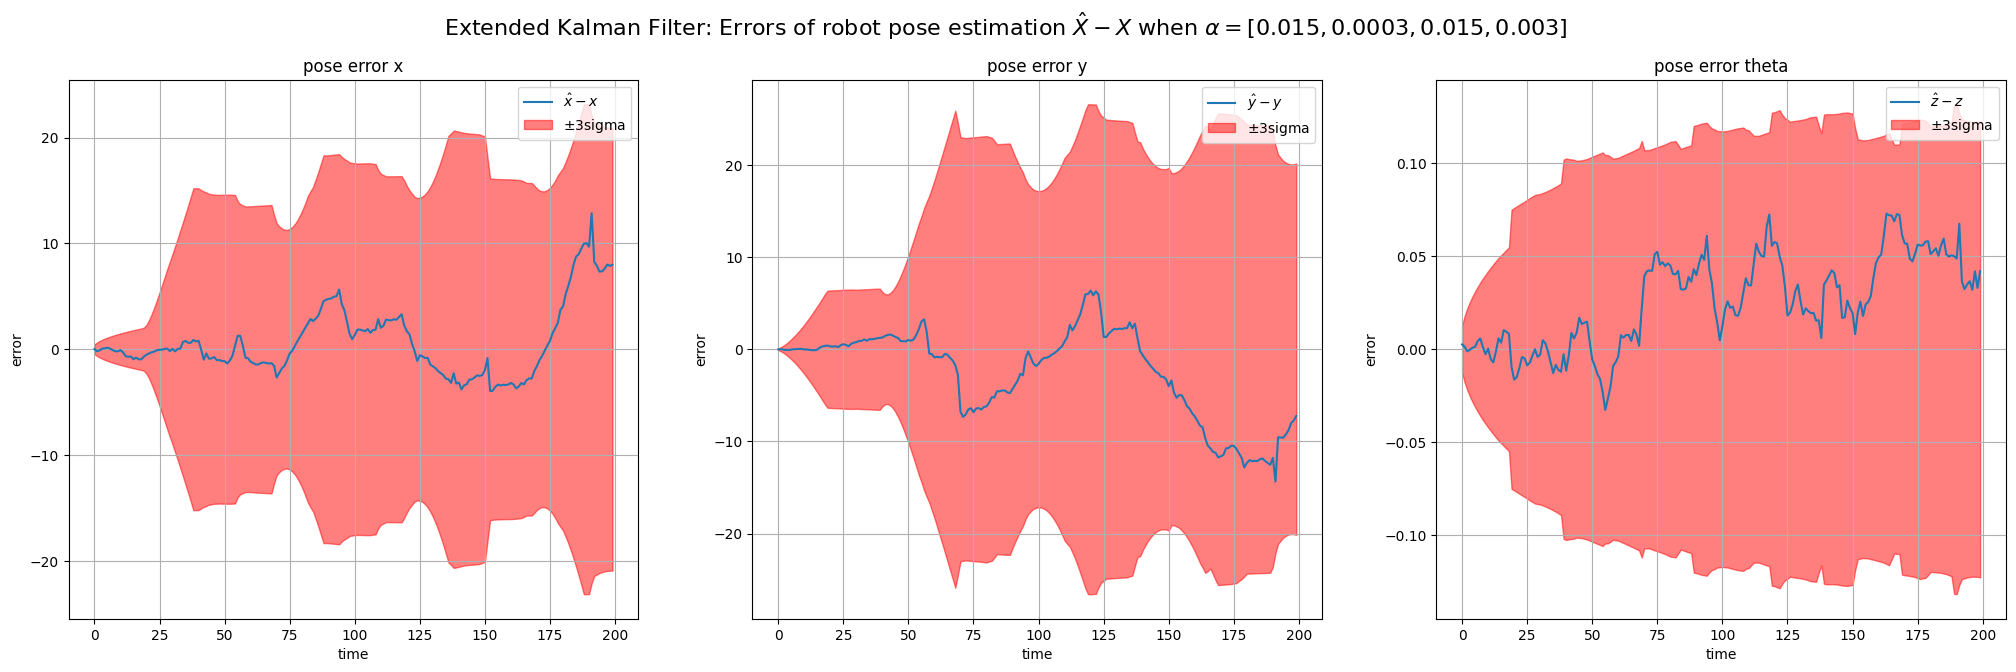

In [65]:
alpha2_input, alpha2_output, covs2 = load_data('Task_D/alpha2/input_data.npy', 'Task_D/alpha2/output_data.npy')

alpha2_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $\alpha=[0.015 , 0.0003, 0.015 , 0.003 ]$'

plot_results(alpha2_input['real_robot_path'], alpha2_output['mean_trajectory'], covs2, alpha2_input['num_steps'], plt_title = alpha2_title)

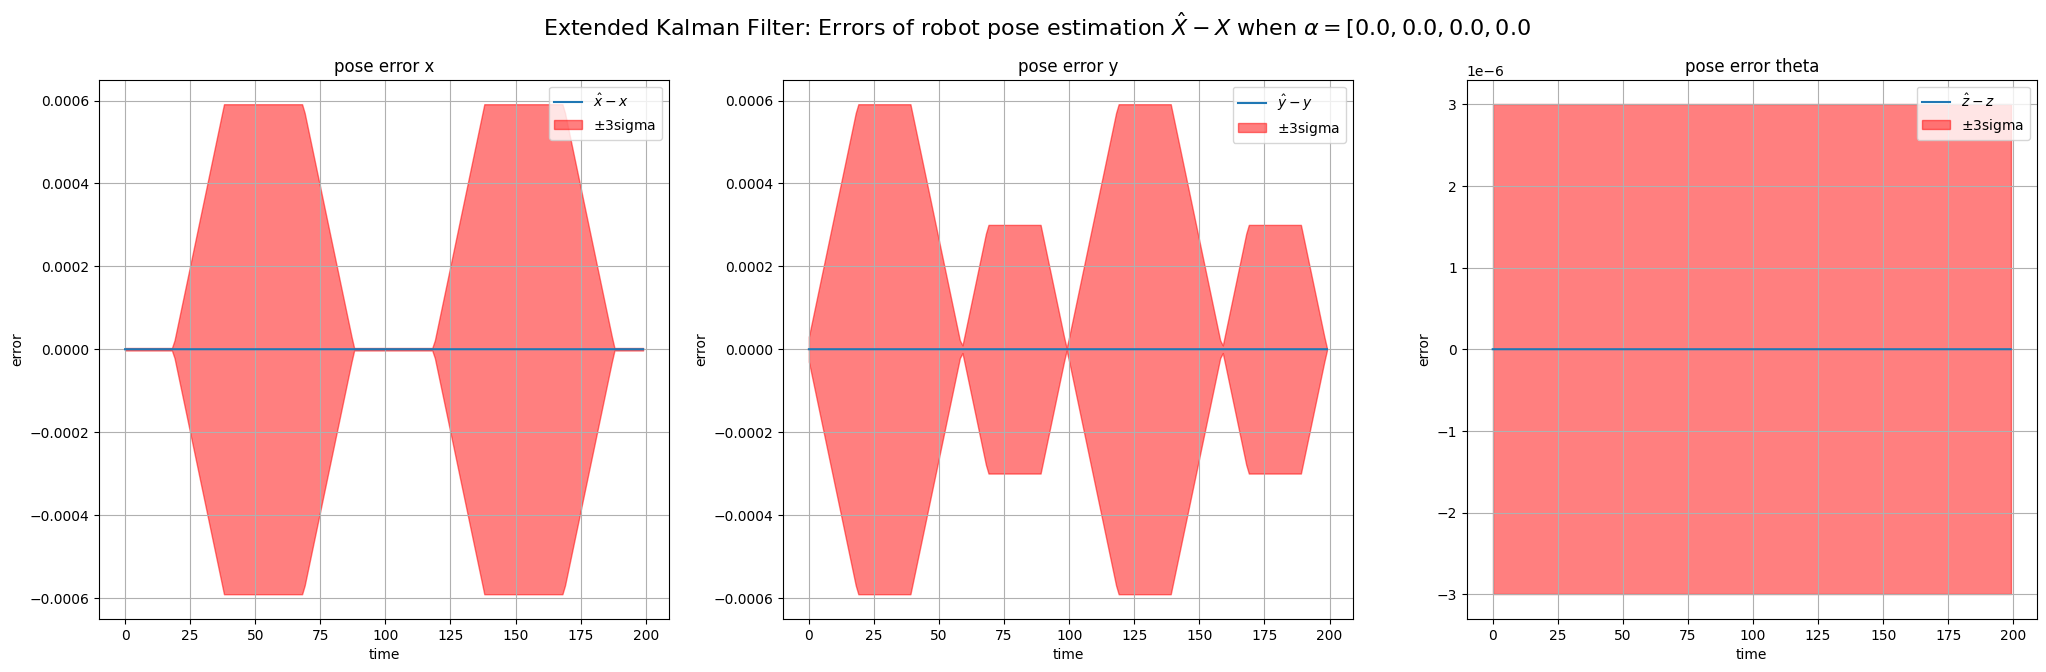

In [66]:
alpha3_input, alpha3_output, covs3 = load_data('Task_D/alpha3/input_data.npy', 'Task_D/alpha3/output_data.npy')

alpha3_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $\alpha=[0.0, 0.0, 0.0, 0.0$'

plot_results(alpha3_input['real_robot_path'], alpha3_output['mean_trajectory'], covs3, alpha3_input['num_steps'], plt_title = alpha3_title)

Comment: the $\pm 3\sigma$ interval becomes less and hence the uncertainty in position estimation decreases.

**2. How does EKF behaves when motion noise $Q_t$ goes towards zero?**

Let us assume following sets of measurement noise constants:

1: $ Q_1 = 0.2^2 $

2: $ Q_2 = 0.05^2 $

3: $ Q_3 = 0 $

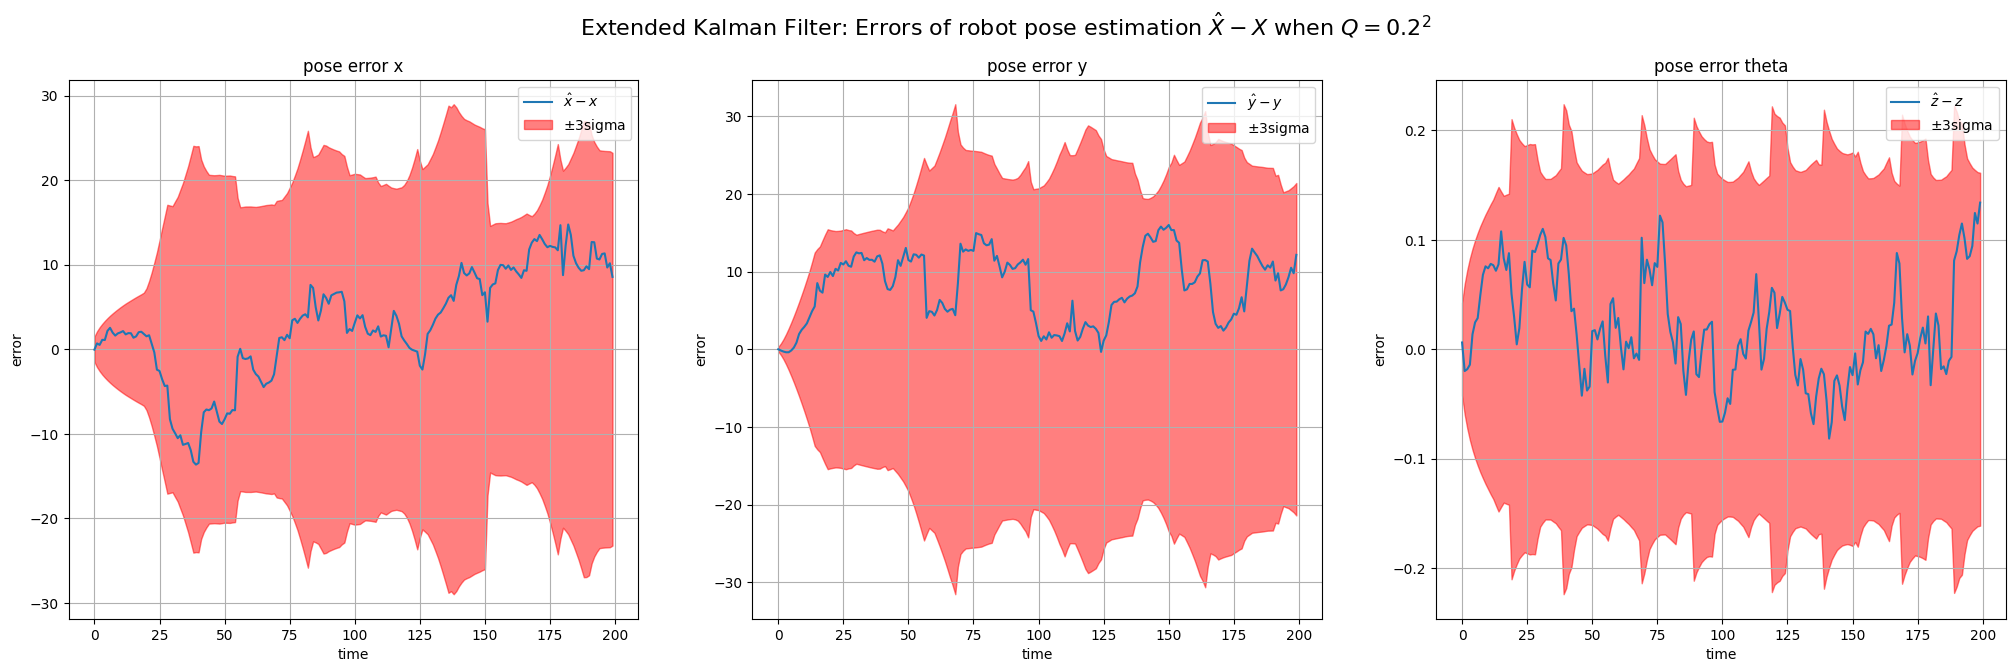

In [68]:
q1_input, q1_output, covs1 = load_data('Task_D/q1/input_data.npy', 'Task_D/q1/output_data.npy')

q1_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $Q=0.2^2$'

plot_results(q1_input['real_robot_path'], q1_output['mean_trajectory'], covs1, q1_input['num_steps'], plt_title = q1_title)

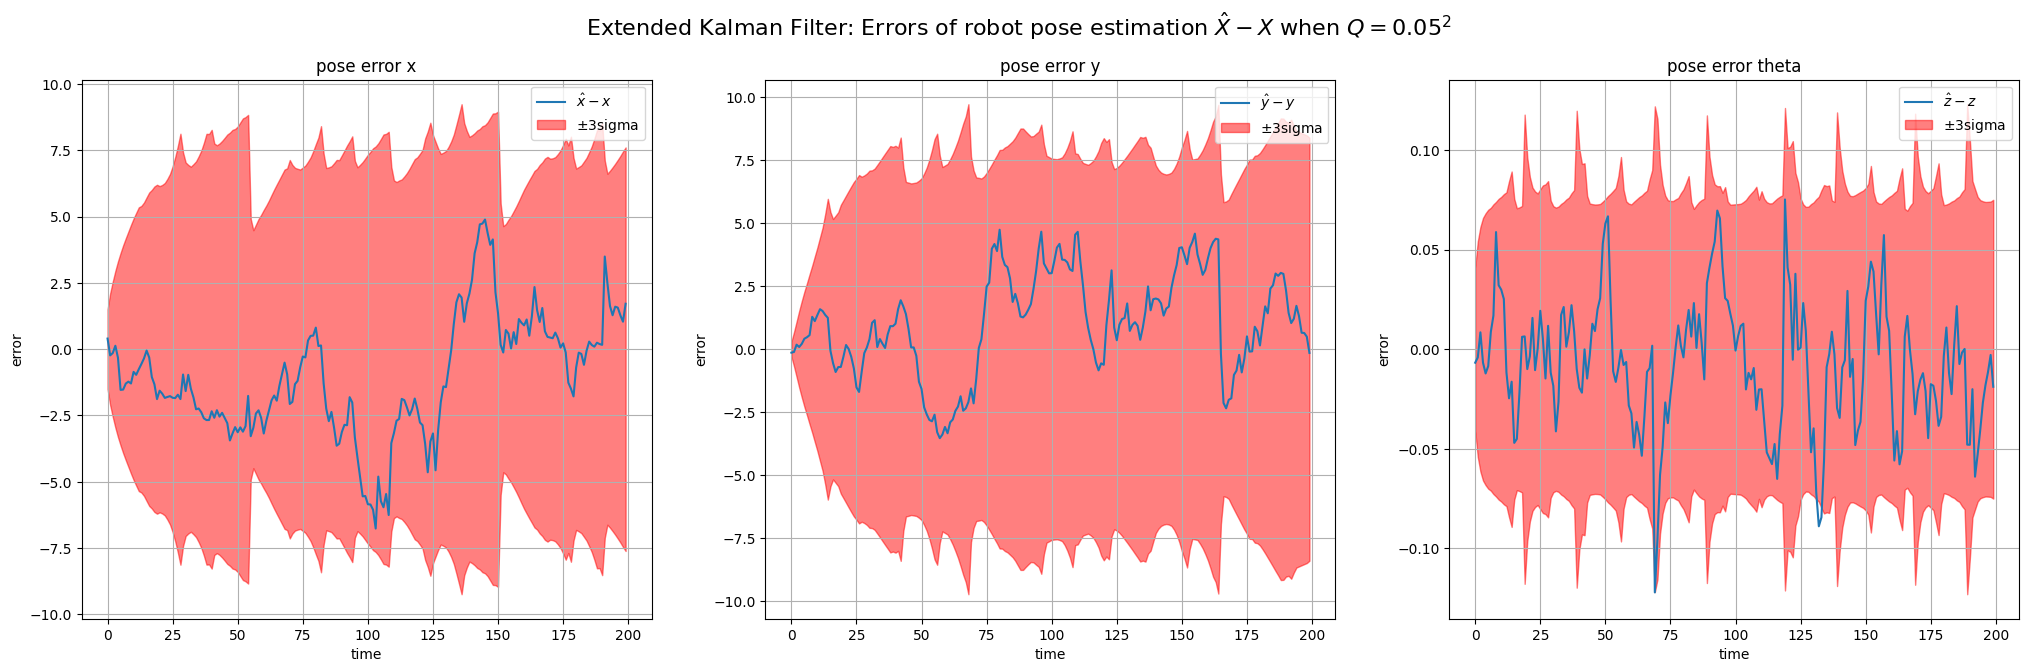

In [69]:
q2_input, q2_output, covs2 = load_data('Task_D/q2/input_data.npy', 'Task_D/q2/output_data.npy')

q2_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $Q=0.05^2$'

plot_results(q2_input['real_robot_path'], q2_output['mean_trajectory'], covs2, q2_input['num_steps'], plt_title = q2_title)

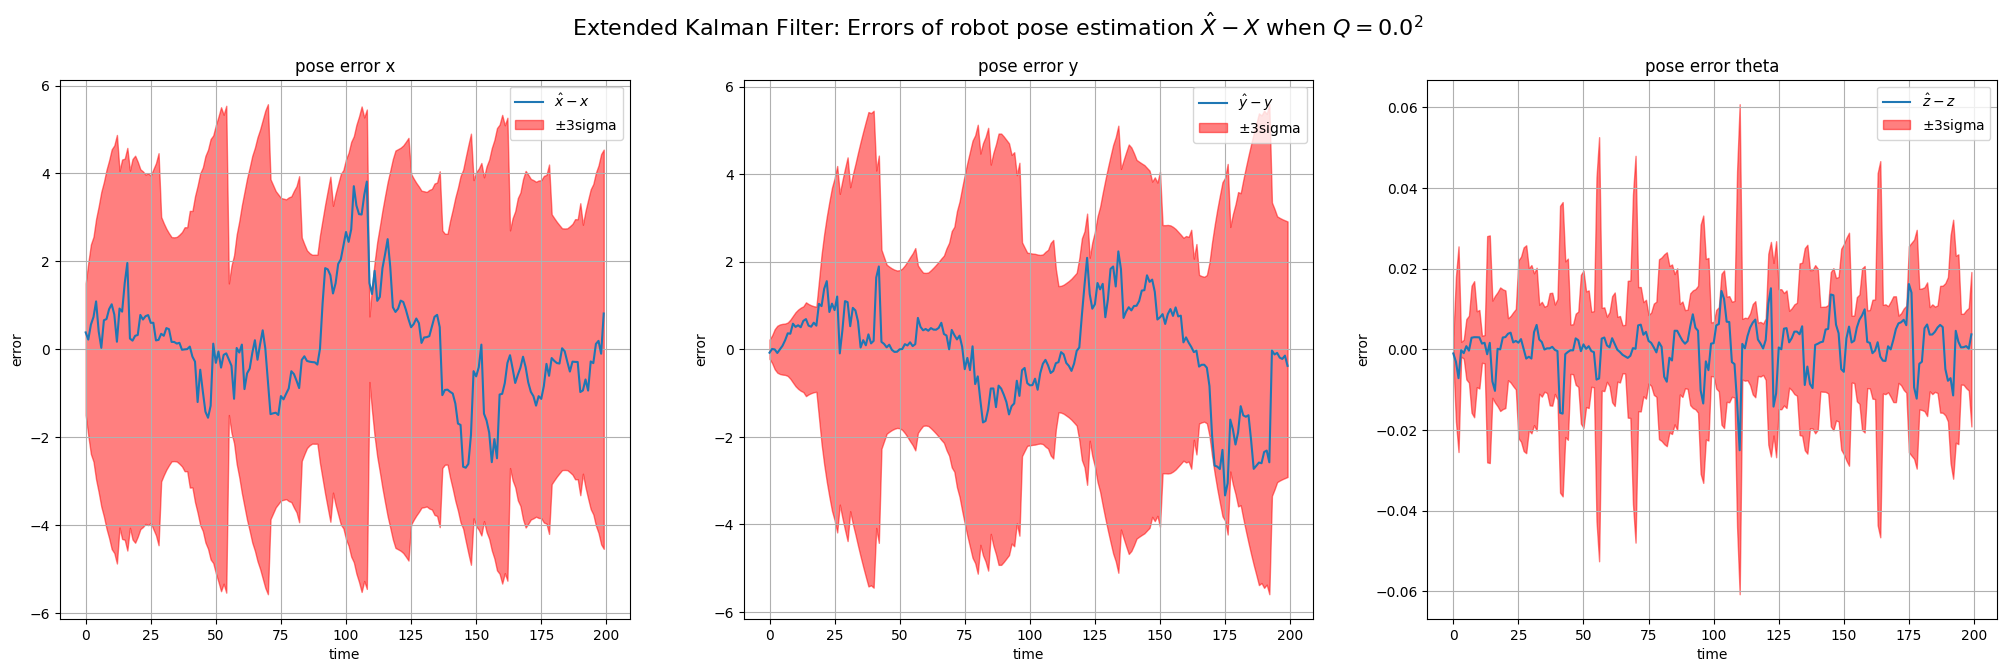

In [71]:
q3_input, q3_output, covs3 = load_data('Task_D/q3/input_data.npy', 'Task_D/q3/output_data.npy')

q3_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $Q=0.0^2$'

plot_results(q3_input['real_robot_path'], q3_output['mean_trajectory'], covs3, q3_input['num_steps'], plt_title = q3_title)

Comment: Here we can also see that uncertainty decreases, but since we still have motion noise than can not absolutely rely on measurements and eleminate estimation errors.

**3. How does PF behaves when  amount of particles is decreased ?**

Let us assume following sets of number of particles in order to investigate properties of PF:

1: `num_particles`$ = 50$

1: `num_particles`$ = 10$

3: `num_particles`$ = 5$

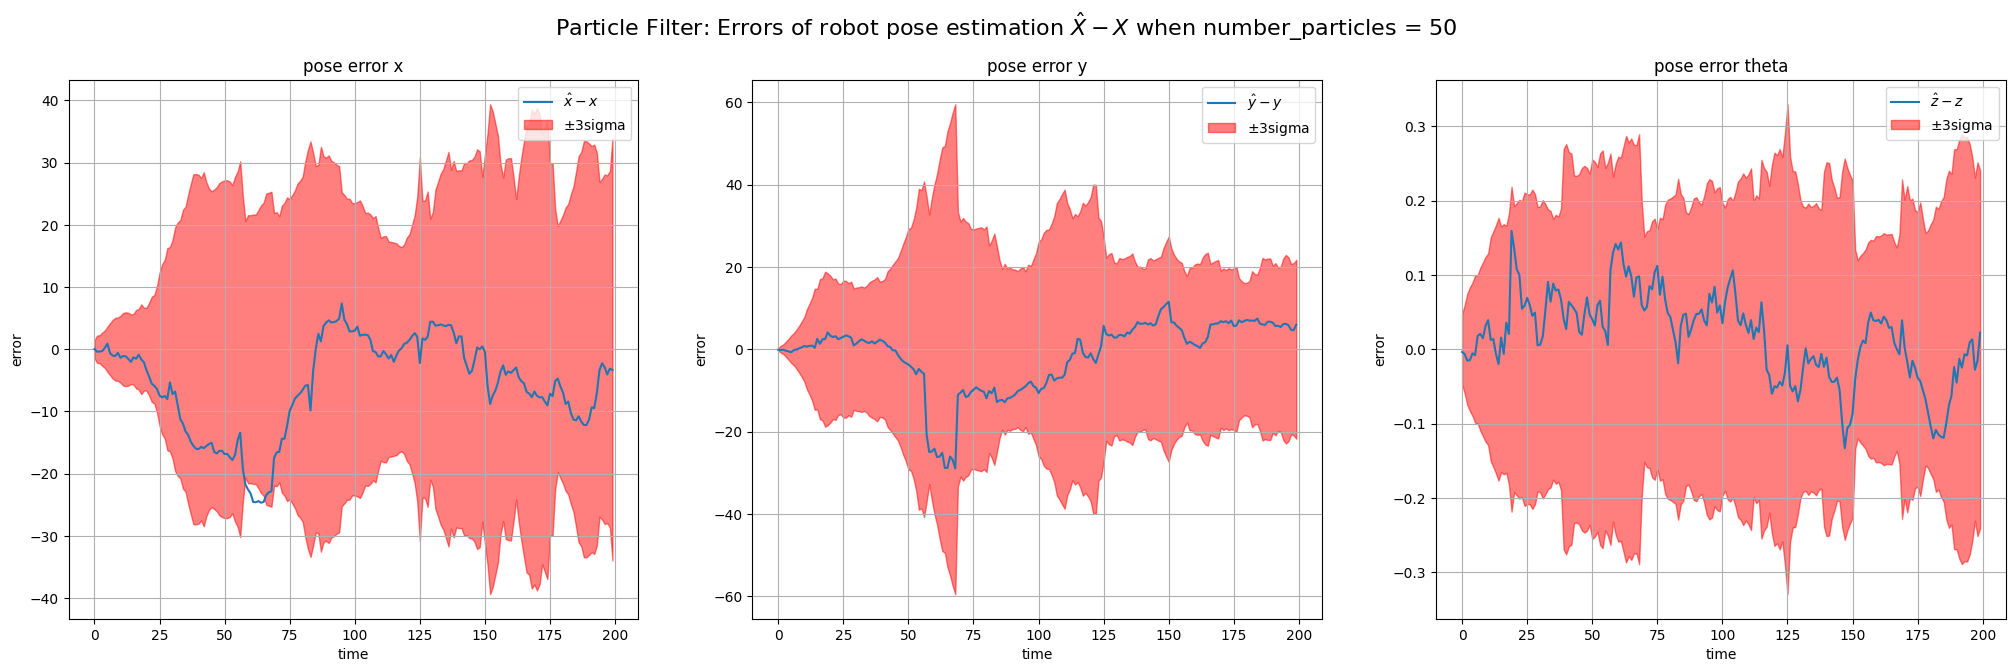

In [105]:
input, output, covs = load_data('Task_D/num_part50/input_data.npy', 'Task_D/num_part50/output_data.npy')

title = r'Particle Filter: Errors of robot pose estimation $\hat{X} - X$ when number_particles = 50'

plot_results(input['real_robot_path'], output['mean_trajectory'], covs, input['num_steps'], plt_title = title)

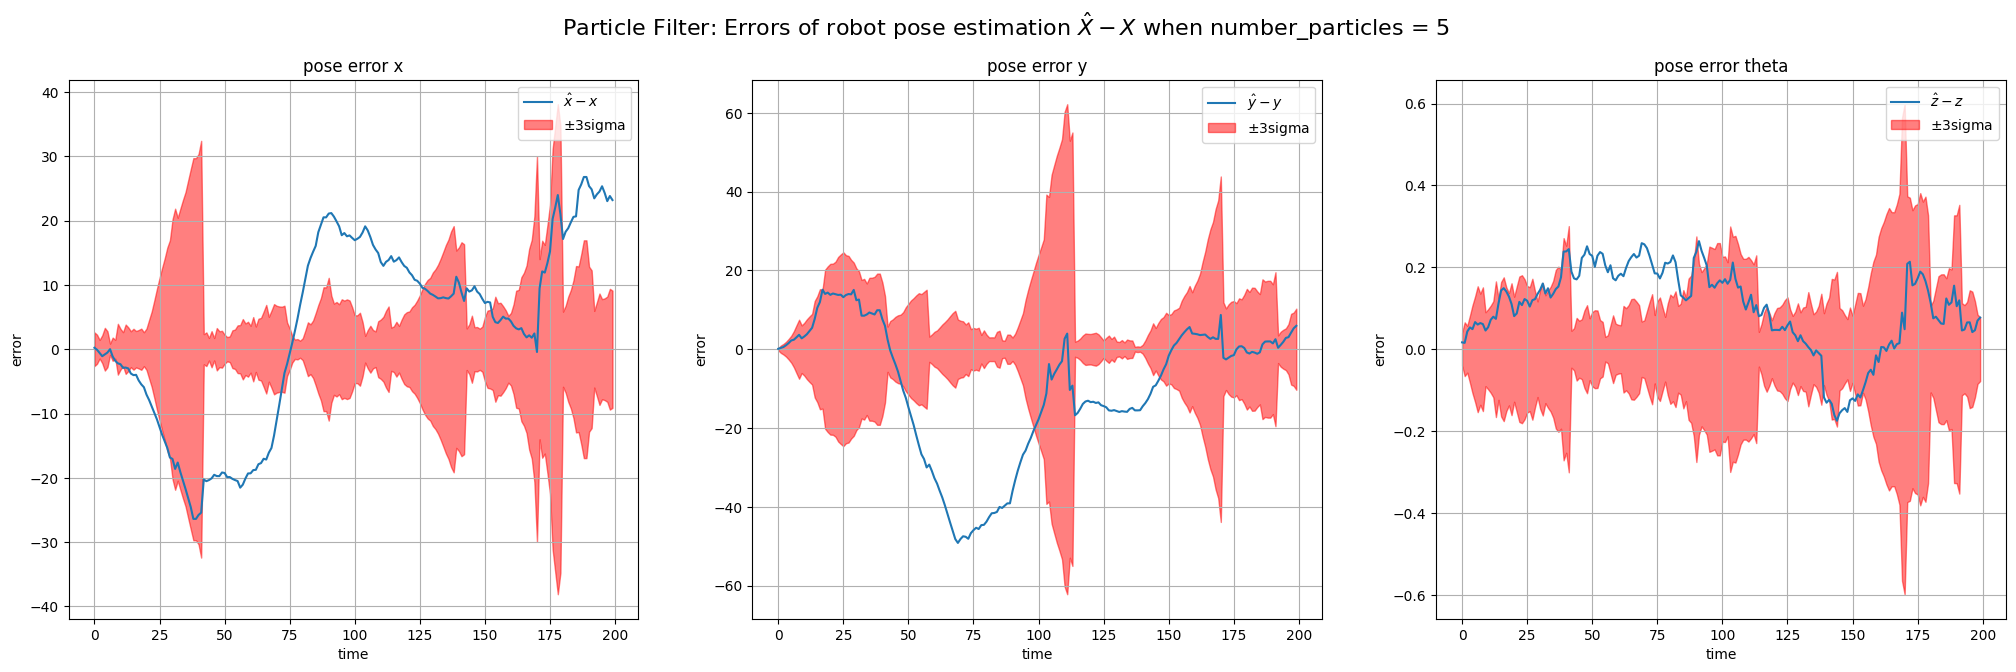

In [106]:
input, output, covs = load_data('Task_D/num_part5/input_data.npy', 'Task_D/num_part5/output_data.npy')

title = r'Particle Filter: Errors of robot pose estimation $\hat{X} - X$ when number_particles = 5'

plot_results(input['real_robot_path'], output['mean_trajectory'], covs, input['num_steps'], plt_title = title)

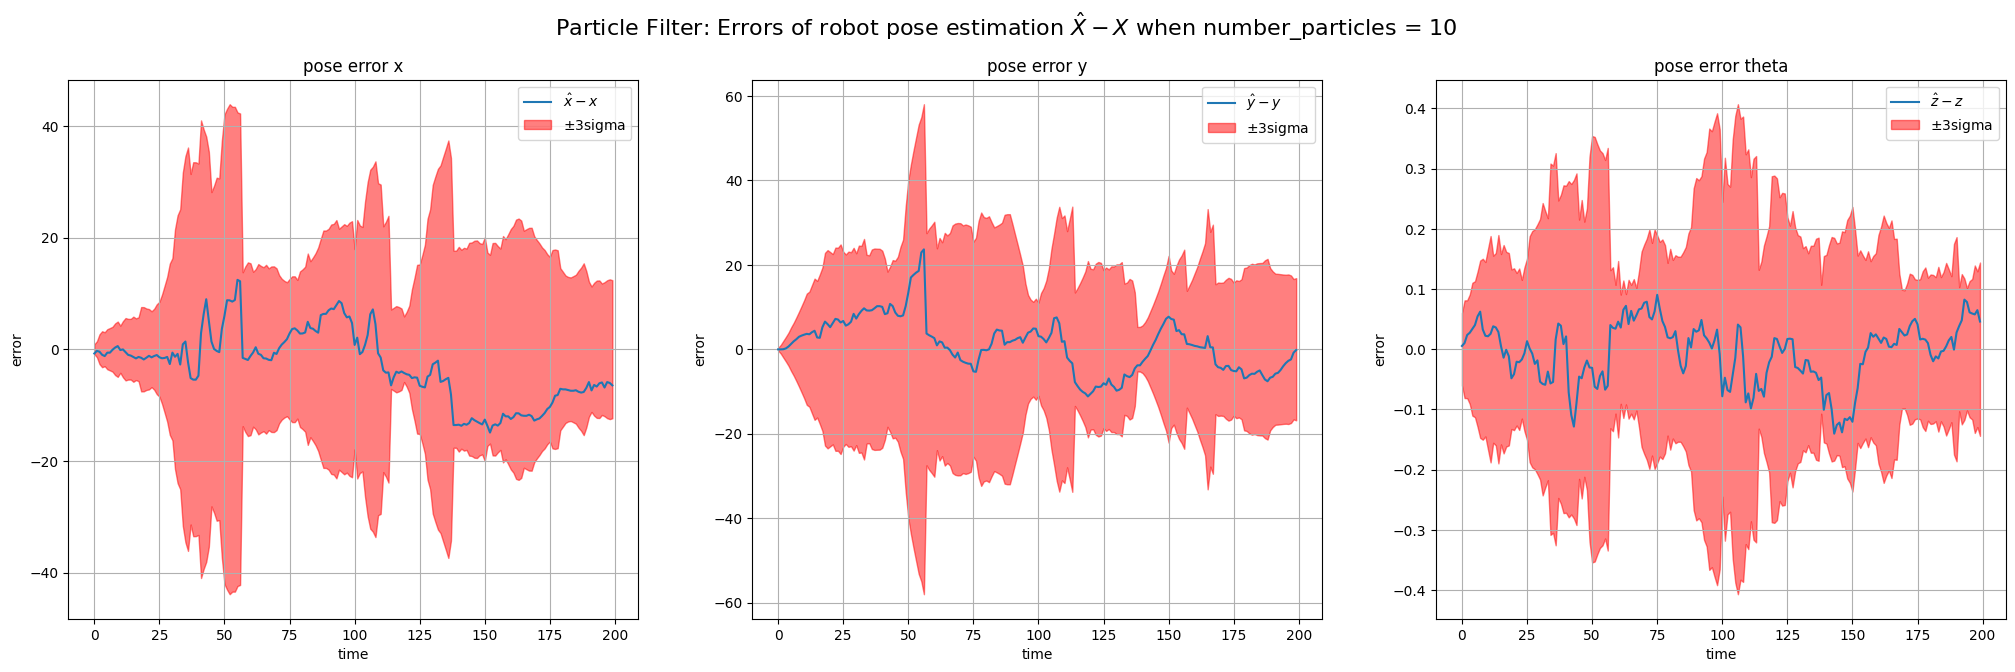

In [107]:
input, output, covs = load_data('Task_D/num_part10/input_data.npy', 'Task_D/num_part10/output_data.npy')

title = r'Particle Filter: Errors of robot pose estimation $\hat{X} - X$ when number_particles = 10'

plot_results(input['real_robot_path'], output['mean_trajectory'], covs, input['num_steps'], plt_title = title)

Comment: when number of particles is extremely decreased, we can not provide a good estimation, the distribution of particles tells provide us with wrong localaziton information.

4. How does EKF behaves when we underestimate or overestimate motion noise and measurement noise?

Motion noise:

1: $ \alpha = 2 \cdot [0.05, 0.001, 0.05, 0.01] $ - Overestimated motion noise

2: $ \alpha = 0.5 \cdot [0.05, 0.001, 0.05, 0.01] $ - Underestimated motion noise

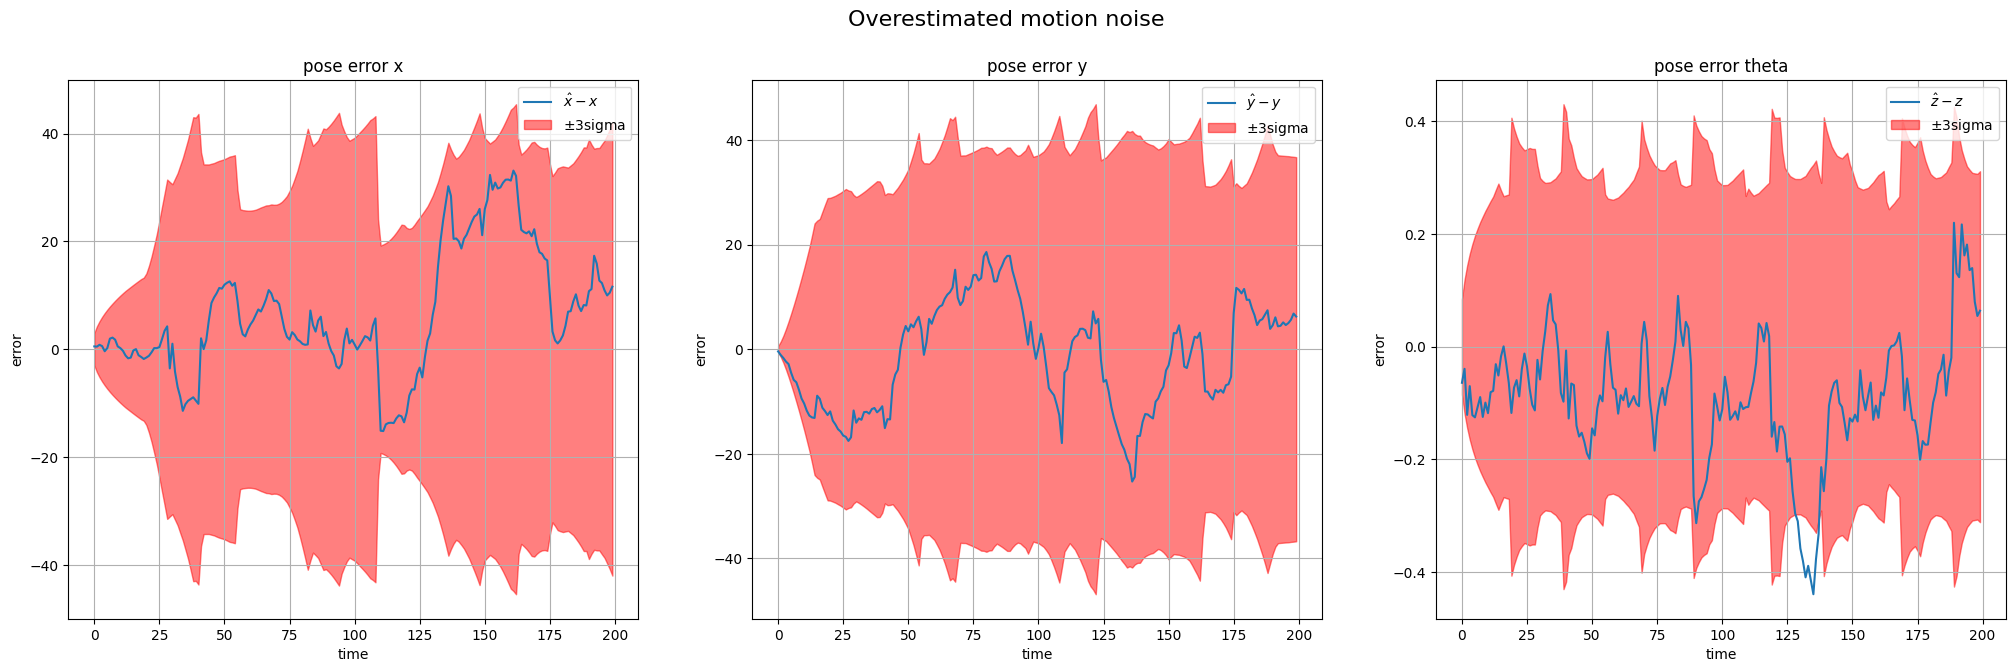

In [98]:
input, output, covs = load_data('Task_D/part4/set1/input_data.npy', 'Task_D/part4/set1/output_data.npy')

title = r'Overestimated motion noise'

plot_results(input['real_robot_path'], output['mean_trajectory'], covs, input['num_steps'], plt_title = title)

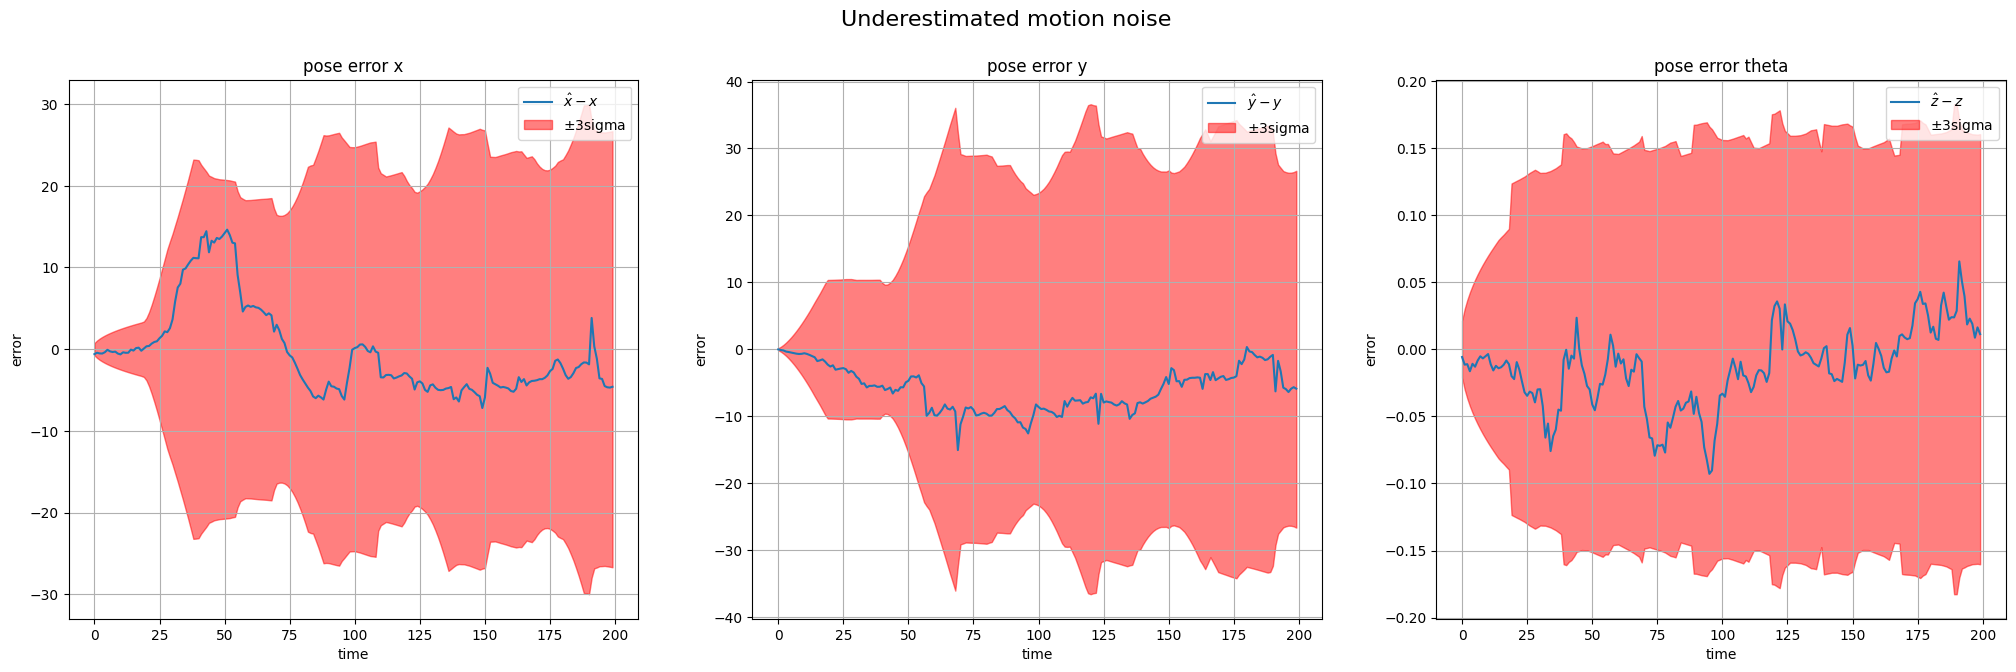

In [99]:
input, output, covs = load_data('Task_D/part4/set2/input_data.npy', 'Task_D/part4/set2/output_data.npy')

title = r'Underestimated motion noise'

plot_results(input['real_robot_path'], output['mean_trajectory'], covs, input['num_steps'], plt_title = title)

Comment: Underestimation or overestimation of the motion noise does not much affect the perfomance of EKF.

Observation noise:

1: $ Q_1 = 0.6^2 $ - Overestimated measurement noise

2: $ Q_2 = 0.1^2 $ - Underestimated measurement noise

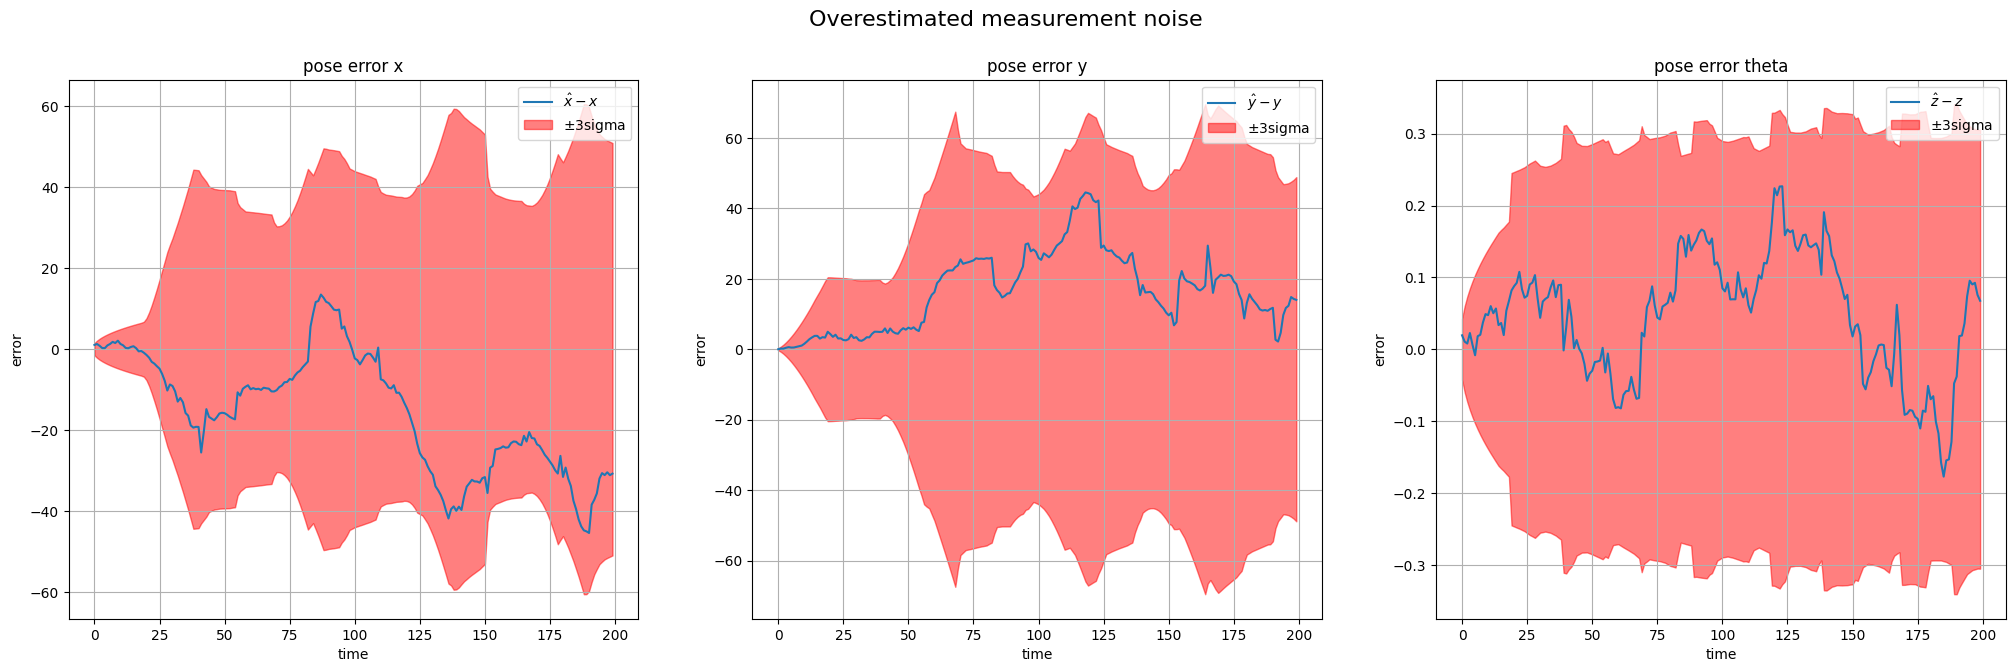

In [103]:
input, output, covs = load_data('Task_D/part4/q1/input_data.npy', 'Task_D/part4/q1/output_data.npy')

title = r'Overestimated measurement noise'

plot_results(input['real_robot_path'], output['mean_trajectory'], covs, input['num_steps'], plt_title = title)

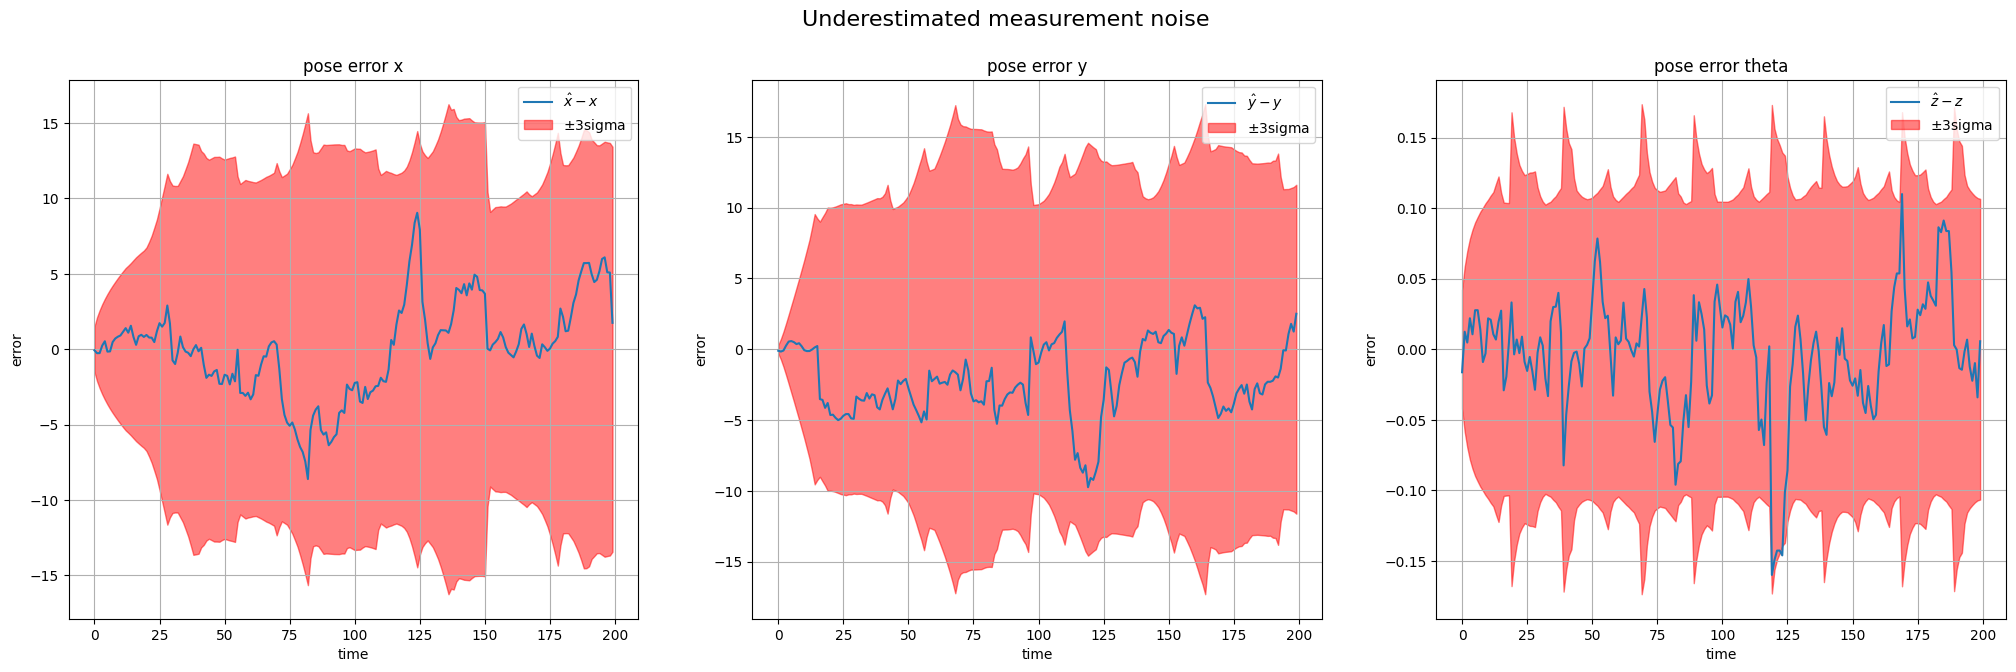

In [104]:
input, output, covs = load_data('Task_D/part4/q2/input_data.npy', 'Task_D/part4/q2/output_data.npy')

title = r'Underestimated measurement noise'

plot_results(input['real_robot_path'], output['mean_trajectory'], covs, input['num_steps'], plt_title = title)

Comment: we got the results of increased $\sigma$ gap of possible estimation values